techniques for outlier Detection and removal
1) Z-score method
2)  I.Q.R method
3) Winsorization method (Percentile Capping)
4) Percentile
5) Visualizing the data

outlier treatment
1) trimming : remove outlier
2) capping: capping or convert into max or min value

# Z-score method

This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean: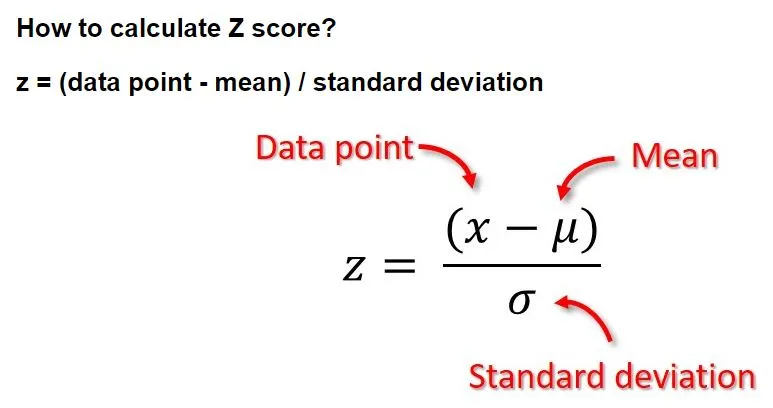

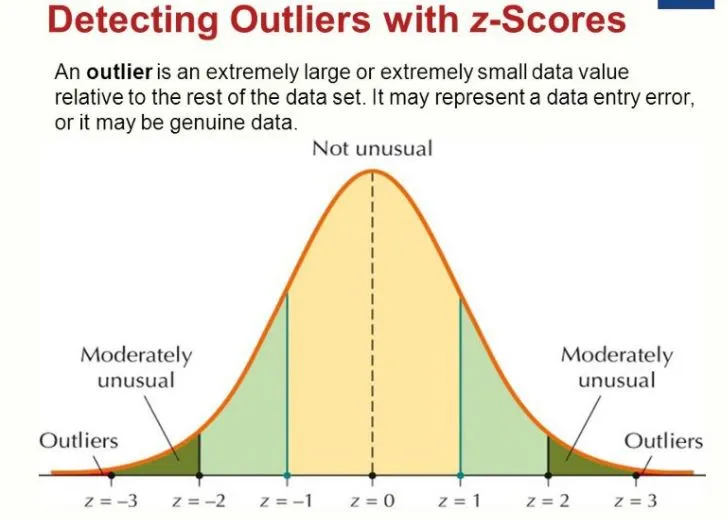

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Dell\AppData\Local\Temp\ipykernel_644\4260214945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_644\4260214945.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

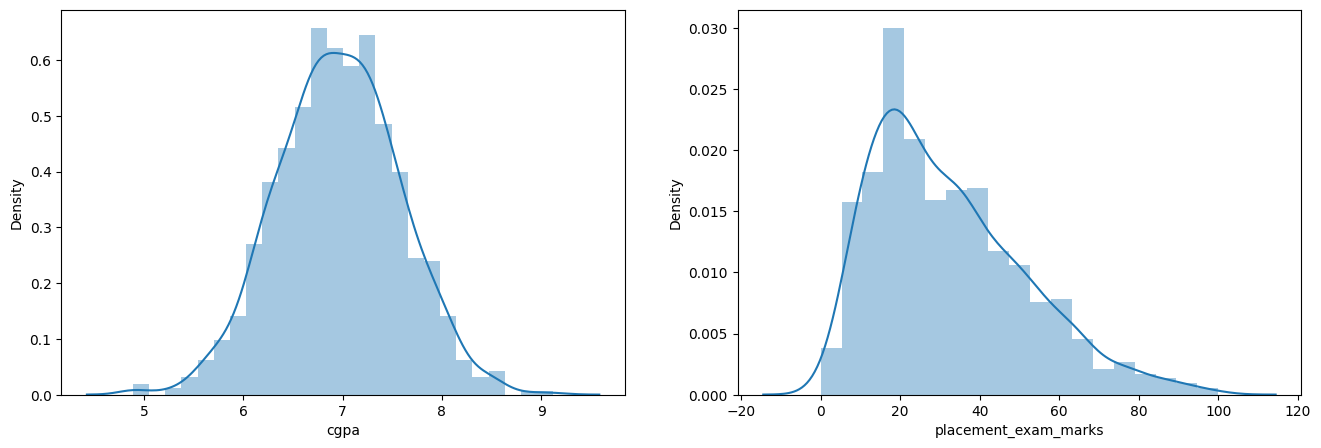

In [7]:
plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [8]:
print('mean value of cgpa',df['cgpa'].mean())
print('std value of cgpa',df['cgpa'].std())
print('min value',df['cgpa'].min())
print('max value', df['cgpa'].max())

mean value of cgpa 6.96124
std value of cgpa 0.6158978751323896
min value 4.89
max value 9.12


In [9]:
# find the boundary value
print('highest allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest allowed',df['cgpa'].mean()-3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [14]:
# find the outliers
df[(df['cgpa']>8.80) |(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming
remove the these rows

In [15]:
new_df=df[(df['cgpa']<8.80) |(df['cgpa']>5.11)]

In [18]:
new_df.sample(5)

,cgpa,placement_exam_marks,placed
568,8.13,4.0,0
772,6.63,26.0,0
84,5.65,35.0,1
539,6.79,14.0,0
511,7.53,50.0,0


In [22]:
# Approch 2
# calculating the Z-score

df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [23]:
df.head()

,cgpa,placement_exam_marks,placed,cpga_zscore,cgpa_zscore
0,7.19,26.0,1,0.371425,0.371425
1,7.46,38.0,1,0.809810,0.809810
2,7.54,40.0,1,0.939701,0.939701
3,6.42,8.0,1,-0.878782,-0.878782
4,7.23,17.0,0,0.436371,0.436371


In [24]:
df[(df['cgpa_zscore']>3)| (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cpga_zscore,cgpa_zscore
485,4.92,44.0,1,-3.314251,-3.314251
995,8.87,44.0,1,3.099150,3.099150
996,9.12,65.0,1,3.505062,3.505062
997,4.89,34.0,0,-3.362960,-3.362960
999,4.90,10.0,1,-3.346724,-3.346724


In [25]:
# triming
new_df1=df[(df['cgpa_zscore']<3)| (df['cgpa_zscore']>-3)]

In [26]:
new_df1.head()

,cgpa,placement_exam_marks,placed,cpga_zscore,cgpa_zscore
0,7.19,26.0,1,0.371425,0.371425
1,7.46,38.0,1,0.809810,0.809810
2,7.54,40.0,1,0.939701,0.939701
3,6.42,8.0,1,-0.878782,-0.878782
4,7.23,17.0,0,0.436371,0.436371


# capping

In [27]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [28]:
upper_limit

8.808933625397168

In [29]:
lower_limit

5.113546374602832

In [30]:
df['new_cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,df['cgpa']
    )
)

In [31]:
df.head()

,cgpa,placement_exam_marks,placed,cpga_zscore,cgpa_zscore,new_cgpa
0,7.19,26.0,1,0.371425,0.371425,7.19
1,7.46,38.0,1,0.809810,0.809810,7.46
2,7.54,40.0,1,0.939701,0.939701,7.54
3,6.42,8.0,1,-0.878782,-0.878782,6.42
4,7.23,17.0,0,0.436371,0.436371,7.23


In [32]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [33]:
df['new_cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: new_cgpa, dtype: float64